,Make,Model,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,city_kmpl,highway_kmpl,total_rating
740,Volvo,740,114.0,4.0,MANUAL,rear wheel drive,4.0,Luxury,Midsize,Wagon,8.0769,11.0526,9.5
9759,Chevrolet,Sonic,138.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,11.0526,14.8785,9.5
766,Audi,80,108.0,4.0,MANUAL,front wheel drive,4.0,Luxury,Compact,Sedan,8.0769,11.9028,9.5
4672,Ford,Fiesta,120.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,11.9028,15.3036,9.5
4707,Honda,Fit,130.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,12.3279,15.7287,9.5


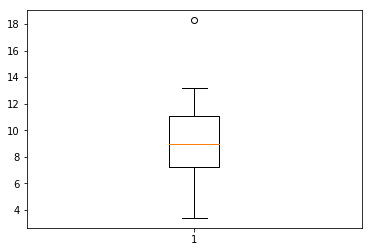

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_csv('new_cars.csv')
df=df.drop_duplicates()
df=df.dropna()
df['rating']=0
df['city_kmpl']=df['city mpg']*0.4251
df['highway_kmpl']=df['highway MPG']*0.4251
df.drop(['city mpg','highway MPG'],axis=1,inplace=True)
df.columns=[column.replace(" ","_")for column in df.columns]
df['city_kmpl'].mean()

df['Driven_Wheels'].unique()
df['Driven_Wheels']=df['Driven_Wheels'].replace(to_replace='four wheel drive',value='all wheel drive')
df['Driven_Wheels'].unique()
df['milage_rating'] = df['city_kmpl'].apply(lambda kmpl: 2 if kmpl >= 8 else 0)
df['drs_rating'] = df['Number_of_Doors'].apply(lambda doors: 2 if doors >= 4 else 1)
df['transmission'] = df['Transmission_Type'].apply(lambda t: 1 if t =='MANUAL' else 0)
df['engn_hp'] = df['Engine_HP'].apply(lambda hp: 2 if hp <= 150 else 1)
def drv_rate(row):
    if row["Driven_Wheels"] == "real wheel drive":
        return 1
    elif row["Driven_Wheels"] == "all wheel drive":
        return 1
    else:
        return 2.5

df = df.assign(drv_rate=df.apply(drv_rate, axis=1))

df['total_rating']=df['milage_rating']+df['drs_rating']+df['transmission']+df['engn_hp']+df['drv_rate']
df2=df.sort_values('total_rating',ascending=False)
df2=df2.drop_duplicates(subset='Make', keep='first')
df2.drop(['milage_rating','drs_rating','transmission','engn_hp','drv_rate','rating',],axis=1,inplace=True)
df2.head()
plt.boxplot(df2['city_kmpl'])
df2.head()